# 用神经网络预测线性函数的数据
但是预测结果不对，不知道是为什么
2023年6月28
给数据加了标准化处理，就可以了

In [1]:
#导入需要使用的库
import numpy as np
import pandas as pd #读取csv文件的库
import matplotlib.pyplot as plt
import torch
import torch.optim as optim

# 让输出的图形直接在Notebook中显示
%matplotlib inline

## 1.读取数据

In [2]:
#读取数据到内存中，rides为一个dataframe对象
# 这个数据是由此代码生成的D:\GitHub\book_DeepLearning_in_PyTorch_Source\anders-test\myc3\gen-data.py
# 此代码可以显示此数据D:\GitHub\book_DeepLearning_in_PyTorch_Source\anders-test\myc3\show-data.py
data_path = 'liner-data1.csv'
rides = pd.read_csv(data_path)

print(rides.shape)
rowCount = rides.shape[0]
#看看数据长什么样子
rides


(200, 2)


,x,y
0,1.0,99.033600
1,2.0,88.256410
2,3.0,97.706436
3,4.0,87.194520
4,5.0,99.721370
...,...,...
195,196.0,478.521580
196,197.0,493.444640
197,198.0,491.508000
198,199.0,495.742980


## 2.将数据转成numpy数组

In [3]:
xx_arr=rides.drop(['y'], axis=1).values

# 数据标准化
mean, std = xx_arr.mean(), xx_arr.std()
xx_arr = (xx_arr - mean)/std

# print(xx)
yy_arr=rides.drop(['x'], axis=1).values
ymean, ystd = yy_arr.mean(), yy_arr.std()
yy_arr = (yy_arr - ymean)/ystd

# print(yy)
xx = torch.tensor(xx_arr, dtype = torch.float, requires_grad = True)
yy = torch.tensor(yy_arr, dtype = torch.float, requires_grad = True)



## 2.构建神经网络

In [4]:
# 调用PyTorch现成的函数，构建序列化的神经网络
# 定义神经网络架构，1个输入层单元，1个隐含层，1个输出层
input_size = 1
hidden_size = 100
output_size = 1

# 神经网络
neu = torch.nn.Sequential(
    torch.nn.Linear(input_size, hidden_size),
    torch.nn.Sigmoid(),
    torch.nn.Linear(hidden_size, output_size),
)

# 损失函数
cost = torch.nn.MSELoss()
# PyTorch还自带了优化器来自动实现优化算法
optimizer = torch.optim.SGD(neu.parameters(), lr = 0.01)
dic = dict(neu.named_parameters()) 
# print(dic['0.weight'])
# print(dic['0.bias'])


# print(dic['2.weight'])
# print(dic['2.bias'])

## 3.训练

In [5]:

# 神经网络训练循环
losses = []

for i in range(10000):
    predict = neu(xx)
    
    loss = cost(predict, yy)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    losses.append(loss.data.numpy())
    
    # 每隔100步输出一下损失值（loss）
    if i % 100==0:
        print(i, loss.data.numpy())
print('last:', losses[-1])


0 1.4740313
100 0.008977886
200 0.0077755465
300 0.0077642347
400 0.0077544264
500 0.0077449707
600 0.0077358503
700 0.007727042
800 0.007718546
900 0.0077103414
1000 0.0077024098
1100 0.0076947515
1200 0.0076873493
1300 0.007680188
1400 0.007673262
1500 0.0076665636
1600 0.007660076
1700 0.0076537947
1800 0.0076477136
1900 0.0076418174
2000 0.0076361024
2100 0.0076305587
2200 0.0076251836
2300 0.0076199686
2400 0.007614907
2500 0.0076099862
2600 0.007605208
2700 0.007600562
2800 0.0075960415
2900 0.0075916476
3000 0.0075873686
3100 0.007583203
3200 0.0075791436
3300 0.0075751897
3400 0.007571335
3500 0.0075675785
3600 0.007563911
3700 0.0075603295
3800 0.007556834
3900 0.0075534154
4000 0.007550077
4100 0.0075468104
4200 0.007543617
4300 0.0075404877
4400 0.007537423
4500 0.0075344252
4600 0.0075314855
4700 0.0075286026
4800 0.0075257765
4900 0.0075230016
5000 0.007520278
5100 0.007517604
5200 0.007514977
5300 0.0075123976
5400 0.007509859
5500 0.007507361
5600 0.0075049032
5700 0.007

## 4.图形展示损失值

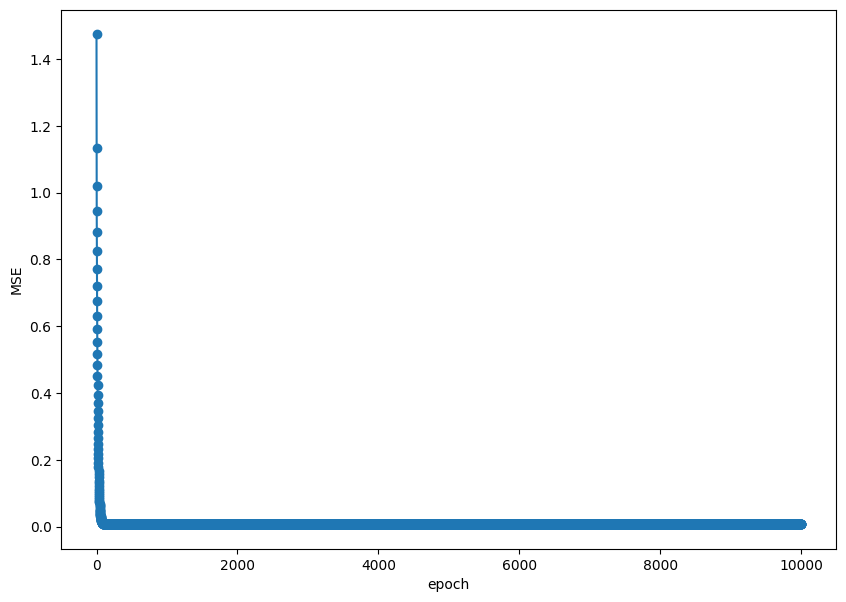

In [6]:
# 打印输出损失值
fig = plt.figure(figsize=(10, 7))
plt.plot(np.arange(len(losses)),losses, 'o-')
plt.xlabel('epoch')
plt.ylabel('MSE')
plt.show()

## 5.画出神经网络的函数曲线

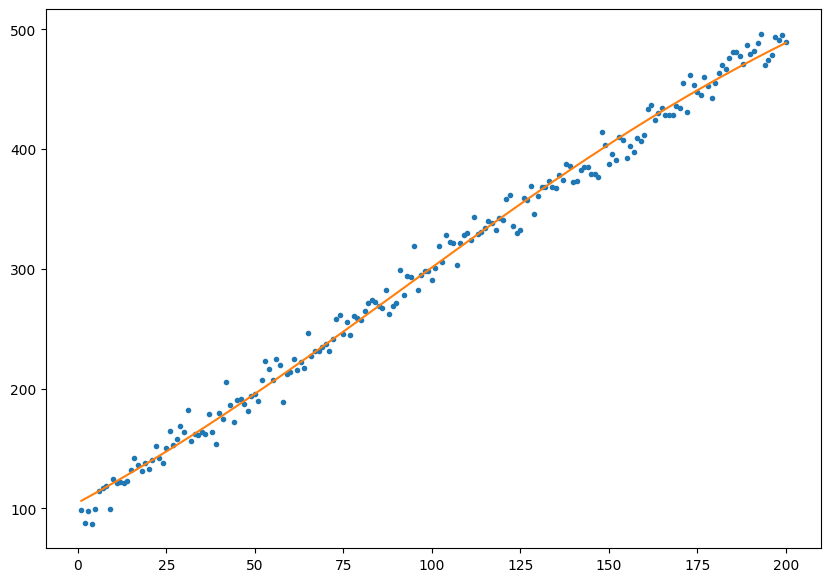

In [7]:
# 用散点表示的样本数据
targets_x = xx.data.numpy().reshape([rowCount,1]) 
targets_x = targets_x.astype(float) 
targets_x = targets_x * std + mean

targets_y = yy.data.numpy().reshape([rowCount,1]) 
targets_y = targets_y.astype(float) 
targets_y = targets_y * ystd + ymean
fig, ax = plt.subplots(figsize = (10, 7))
ax.plot(targets_x, targets_y, '.')


# 用折线表示的预测数据
predict = neu(xx)
predict = predict * ystd + ymean


predict = predict.data.numpy()
ax.plot(targets_x, predict)


In [ ]:
predict = neu([20])